## torch_geometric.data.Data用来存储图信息

In [1]:
import torch
from torch_geometric.data import Data

edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long) #边信息
x = torch.tensor([[-1], [0], [1]], dtype=torch.float) #节点的特征向量

data = Data(x=x, edge_index=edge_index)
data


Data(x=[3, 1], edge_index=[2, 4])

In [2]:
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

# Visualization function for NX graph or PyTorch tensor
def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

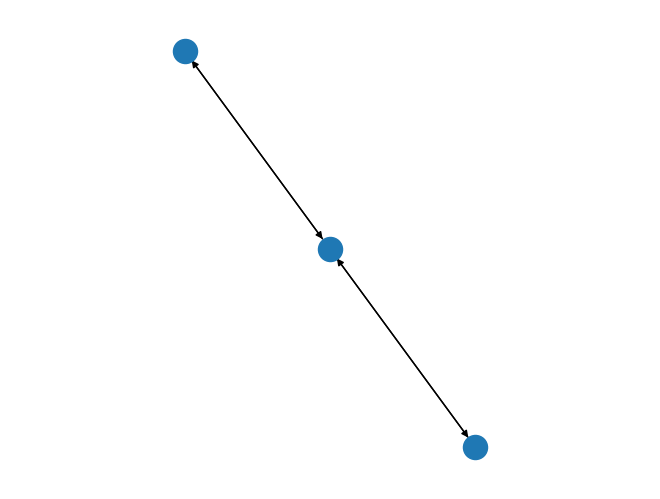

In [3]:
from torch_geometric.utils import to_networkx
G = to_networkx(data=data)
nx.draw(G)

In [4]:
# data的一些function

print(data.keys)

['x', 'edge_index']


In [5]:
print(data['x'])

tensor([[-1.],
        [ 0.],
        [ 1.]])


In [6]:
for key, item in data:
    print(f'{key} found in data')

x found in data
edge_index found in data


In [7]:
'edge_attr' in data

False

In [8]:
data.num_nodes

3

In [9]:
data.num_edges

4

In [10]:
data.num_edge_features
data.has_isolated_nodes()
data.has_self_loops()
data.is_directed()

device = torch.device('cuda')
data = data.to(device=device)

## Common Benchmark Datasets

In [11]:
from torch_geometric.datasets import TUDataset

dataset = TUDataset(root='./data/ENZYMES', name='ENZYMES')


In [12]:
len(dataset)

600

In [13]:
print(dataset.num_classes)
print(dataset.num_node_features)

6
3


In [14]:
data = dataset[0]

In [15]:
train_dataset = dataset[:540]
test_dataset = dataset[540:]
dataset = dataset.shuffle()

### graph node classification

In [16]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='./data/Cora', name='Cora')
print(len(dataset))
print(dataset.num_classes)
print(dataset.num_node_features)


1
7
1433


In [17]:
data = dataset[0]
print(data.is_undirected())
print(data.train_mask.sum().item()) #训练
print(data.val_mask.sum().item()) #结束训练 early stop
print(data.test_mask.sum().item()) # test


True
140
500
1000


## Mini-batches

In [19]:
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader

dataset = TUDataset(root='/data/ENZYMES', name='ENZYMES', use_node_attr=True)
print(dataset)
loader = DataLoader(dataset, batch_size=32, shuffle=True)


for batch in loader:
    print(batch)
    print(batch.num_graphs)

ENZYMES(600)
DataBatch(edge_index=[2, 3674], x=[939, 21], y=[32], batch=[939], ptr=[33])
32
DataBatch(edge_index=[2, 4258], x=[1121, 21], y=[32], batch=[1121], ptr=[33])
32
DataBatch(edge_index=[2, 3762], x=[973, 21], y=[32], batch=[973], ptr=[33])
32
DataBatch(edge_index=[2, 3998], x=[990, 21], y=[32], batch=[990], ptr=[33])
32
DataBatch(edge_index=[2, 3962], x=[1079, 21], y=[32], batch=[1079], ptr=[33])
32
DataBatch(edge_index=[2, 3802], x=[989, 21], y=[32], batch=[989], ptr=[33])
32
DataBatch(edge_index=[2, 4242], x=[1145, 21], y=[32], batch=[1145], ptr=[33])
32
DataBatch(edge_index=[2, 4142], x=[1065, 21], y=[32], batch=[1065], ptr=[33])
32
DataBatch(edge_index=[2, 4338], x=[1180, 21], y=[32], batch=[1180], ptr=[33])
32
DataBatch(edge_index=[2, 4088], x=[1012, 21], y=[32], batch=[1012], ptr=[33])
32
DataBatch(edge_index=[2, 4060], x=[1063, 21], y=[32], batch=[1063], ptr=[33])
32
DataBatch(edge_index=[2, 4162], x=[1071, 21], y=[32], batch=[1071], ptr=[33])
32
DataBatch(edge_index=[2

In [23]:
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader
from torch_geometric.utils import scatter

dataset = TUDataset(root='/data/ENZYMES', name='ENZYMES', use_node_attr=True)
print(dataset)
print(dataset[0] )
loader = DataLoader(dataset, batch_size=32, shuffle=True)


for batch in loader:
    print(batch)
    print(batch.num_graphs)
    
    x = scatter(batch.x, batch.batch, dim = 0, reduce='mean')
    # x.size()
    print(x.size())

ENZYMES(600)
Data(edge_index=[2, 168], x=[37, 21], y=[1])
DataBatch(edge_index=[2, 4182], x=[1100, 21], y=[32], batch=[1100], ptr=[33])
32
torch.Size([32, 21])
DataBatch(edge_index=[2, 3824], x=[1010, 21], y=[32], batch=[1010], ptr=[33])
32
torch.Size([32, 21])
DataBatch(edge_index=[2, 4280], x=[1094, 21], y=[32], batch=[1094], ptr=[33])
32
torch.Size([32, 21])
DataBatch(edge_index=[2, 3178], x=[826, 21], y=[32], batch=[826], ptr=[33])
32
torch.Size([32, 21])
DataBatch(edge_index=[2, 4124], x=[1092, 21], y=[32], batch=[1092], ptr=[33])
32
torch.Size([32, 21])
DataBatch(edge_index=[2, 4082], x=[1027, 21], y=[32], batch=[1027], ptr=[33])
32
torch.Size([32, 21])
DataBatch(edge_index=[2, 3786], x=[990, 21], y=[32], batch=[990], ptr=[33])
32
torch.Size([32, 21])
DataBatch(edge_index=[2, 4034], x=[1114, 21], y=[32], batch=[1114], ptr=[33])
32
torch.Size([32, 21])
DataBatch(edge_index=[2, 4230], x=[1161, 21], y=[32], batch=[1161], ptr=[33])
32
torch.Size([32, 21])
DataBatch(edge_index=[2, 405

## Data Transforms

In [24]:
from torch_geometric.datasets import ShapeNet

dataset = ShapeNet('./data/ShapeNet', categories=['Airplane'])
dataset[0]

Extracting data/ShapeNet/shapenetcore_partanno_segmentation_benchmark_v0_normal.zip
Processing...
Done!


Data(x=[2518, 3], y=[2518], pos=[2518, 3], category=[1])

In [25]:
import torch_geometric.transforms as T
from torch_geometric.datasets import ShapeNet

dataset = ShapeNet(root='./data/ShapeNet',categories=['Airplane'], pre_transform=T.KNNGraph(k=6))

dataset[0]

/home/jkshen/anaconda3/lib/python3.9/site-packages/torch_geometric/data/dataset.py:209: UserWarning: The `pre_transform` argument differs from the one used in the pre-processed version of this dataset. If you want to make use of another pre-processing technique, make sure to delete 'data/ShapeNet/processed' first
  warnings.warn(


Data(x=[2518, 3], y=[2518], pos=[2518, 3], category=[1])

## Learning Methods on Graphs

In [31]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='./data/Cora', name='Cora')

In [33]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)
        
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        
        return F.log_softmax(x, dim=1)
    

In [34]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()


In [36]:
model.eval()
pred = model(data).argmax(dim=1)
collect = (pred[data.test_mask] == data.y[data.test_mask]).sum()
acc = int(collect) / int(data.test_mask.sum())
print(f'Accuracy: {acc:.4f}')



Accuracy: 0.8030
